In [ ]:
# Install Dans diffraction and mendeleev 
!pip install Dans_Diffraction 
!pip install mendeleev

     |████████████████████████████████| 3.6MB 9.6MB/s 


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import Dans_Diffraction as dif
import re
import matplotlib.pyplot as plt
import pandas as pd
import io
import mendeleev as mend
from mendeleev import element


In [ ]:
# Define how many crystal files you will be working with
num_xtals = 11
xtls = []
all_data = []
label_vector = []
all_struc_fac = []
for i in range(num_xtals):
#     dir='insert_correct_path_here/'
    dir='./'
    frame = "cif" + str(i) + ".cif"
    frame=dir+frame
    xtl = dif.Crystal(frame)
    cifvals = dif.functions_crystallography.readcif(frame)
    cif_dict = dif.functions_crystallography.cif2dict(cifvals)
    curr_atom_label = cif_dict['atom type']
    print(curr_atom_label)
    xtls.append(xtl)
    
    xtl.Scatter.setup_scatter(type='x-ray',energy_kev=10)
    xtl.Scatter._return_structure_factor = True
    xtldata = np.array(xtl.Scatter.get_all_reflections(print_symmetric=True))
    all_data.append(xtldata)
    #print(all_data)

Fs=[]
thBs=[]
hkls=[]
for i in range(len(all_data)):
    Fs.append(all_data[i][:,4])
    thBs.append(all_data[i][:,3])
    hkls.append(all_data[i][:,0:3])

print(label_vector)
print(len(Fs))

# Save data
def addDatatoSave(newdata,fname,started=False,dirname='./'):
    if started:
        current=np.load(fname)
        print('save shapes')
        print(current.shape)
        print(newdata.shape)
        newSave=np.concatenate((current,newdata))
        np.save(dirname+fname,newSave)
    if not started:
        newSave=newdata
        np.save(dirname+fname,newSave)
        
        

['Al' 'Al' 'Al' 'Al']
Scattering Options:
                            Type : x-ray
                  Default Energy : 10.000 keV
                    Powder Units : tth
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
                   Sample Offset :  0.00
             Minimum Theta angle : -180.00
             Maximum Theta angle : 180.00
         Minimum Two-Theta angle : -180.00
         Maximum Two-Theta angle : 180.00
['Ca' 'Ca' 'Ca' 'Ca']
Scattering Options:
                            Type : x-ray
                  Default Energy : 10.000 keV
                    Powder Units : tth
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
                   Sample Offset :  0.00
             Minimum Theta angle : -180.00
             Maximum Theta angle : 180.00
         Minimum Two-Theta angle : -180.00
         Maximum Two-Theta angle : 180.00
['Sr' 'Sr']
Scattering Options:
                          

E:\Anaconda3\envs\p3\lib\site-packages\Dans_Diffraction\classes_scattering.py:1187: ComplexWarning: Casting complex values to real discards the imaginary part
  outstr += fmt % (hkl[n,0], hkl[n,1], hkl[n,2],unit[n],inten[n])


['Rh' 'Rh' 'Rh' 'Rh']
Scattering Options:
                            Type : x-ray
                  Default Energy : 10.000 keV
                    Powder Units : tth
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
                   Sample Offset :  0.00
             Minimum Theta angle : -180.00
             Maximum Theta angle : 180.00
         Minimum Two-Theta angle : -180.00
         Maximum Two-Theta angle : 180.00
['Ir' 'Ir' 'Ir' 'Ir']
Scattering Options:
                            Type : x-ray
                  Default Energy : 10.000 keV
                    Powder Units : tth
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
                   Sample Offset :  0.00
             Minimum Theta angle : -180.00
             Maximum Theta angle : 180.00
         Minimum Two-Theta angle : -180.00
         Maximum Two-Theta angle : 180.00
['Ni' 'Ni' 'Ni' 'Ni']
Scattering Options:
                

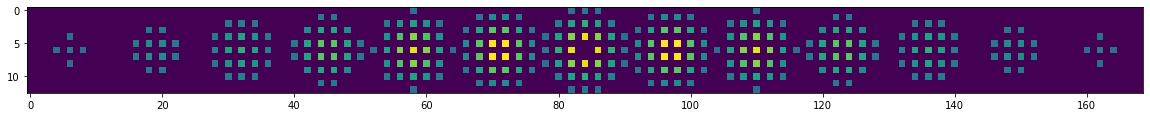

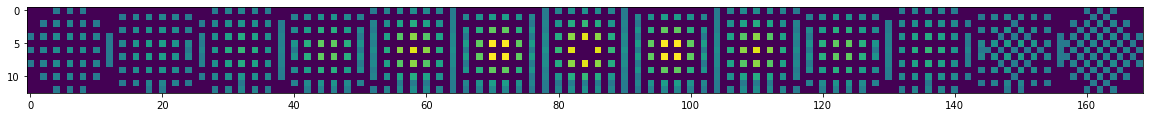

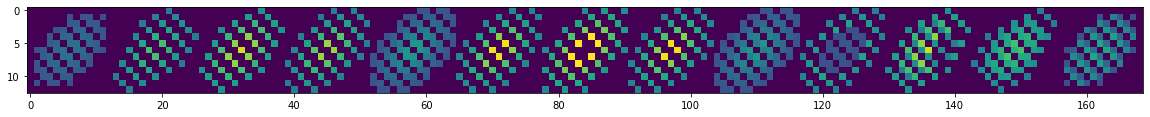

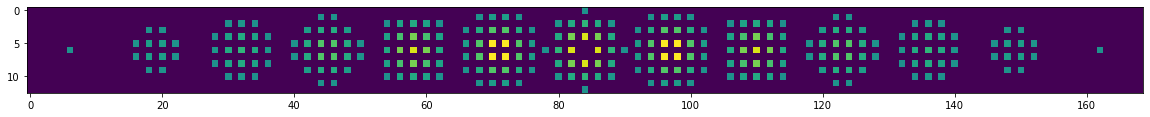

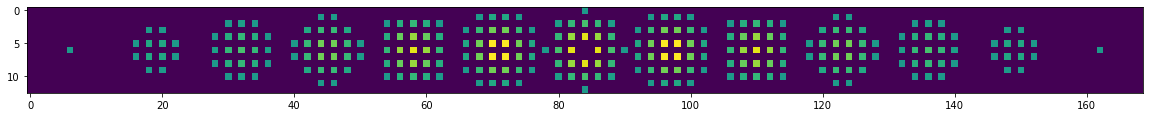

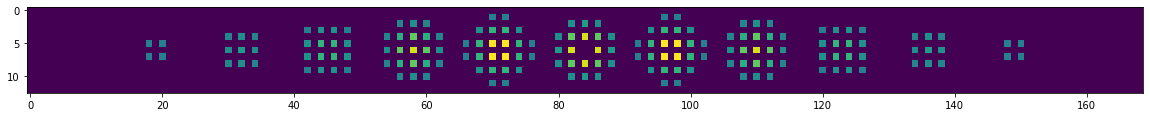

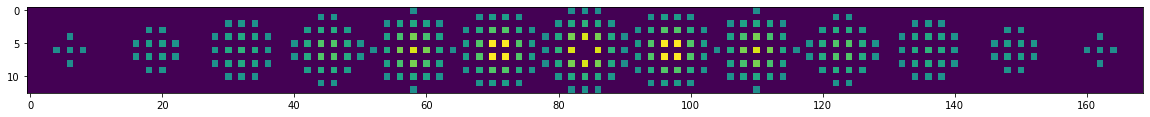

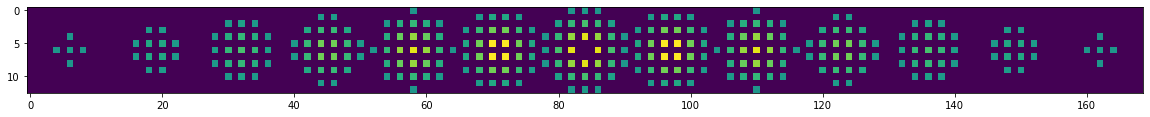

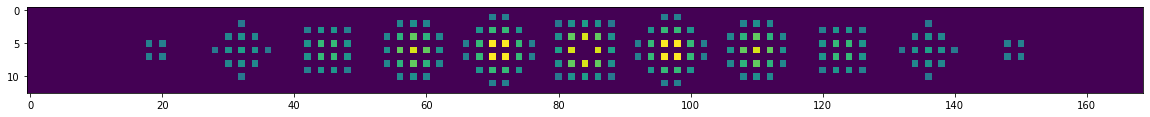

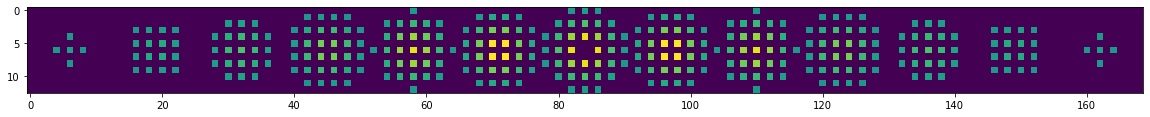

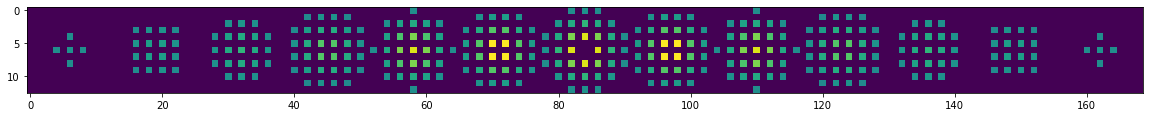

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots

Nmin=-6
Nmax=6
sample=3
hklsample=hkls[sample]+Nmax
Fsample=Fs[sample]

def makeStructureFactorSlices(hklsample,Fsample, Nmin = -6,Nmax = 6):
  # this function should make the images representing slices of the Ewald sphere for phase and amplitude
  amplitude=np.zeros(((Nmax-Nmin+1),(Nmax-Nmin+1)**2))#add one for the zero
  
  phases=np.zeros(((Nmax-Nmin+1),(Nmax-Nmin+1)**2))
  for i in range(len(hklsample)):
    hkl=np.real(hklsample[i])
    F=np.abs(Fsample[i])
    phase=np.angle(Fsample[i])
    indx=int(hkl[0])
    indy=int(((Nmax-Nmin+1)*hkl[2])+hkl[1])
  
    if indx<len(amplitude) and indy<len(amplitude[0]):
      amplitude[indx,indy]=F
      phases[indx,indy]=phase
  
  return amplitude,phases

# Saves data
def Store_Xtals(hkls,Fs,filename='xtals_test.npy'):
  ampAll=[]
  for i in range(num_xtals):
    sample=i
    hklsample=hkls[sample]+Nmax
    Fsample=Fs[sample]
    amp,phase=makeStructureFactorSlices(hklsample,Fsample,Nmin,Nmax)
    ampAll.append(amp)
  np.save(filename,np.array(ampAll))
Store_Xtals(hkls,Fs)

# Load data
def load_Xtals(filename='xtals_test.npy'):
  Xtals=np.load(filename)
  for i in range(len(Xtals)):
    
    plt.imshow(Xtals[i])
    plt.show()
load_Xtals()

In [ ]:
num_shifts = 1000

shift_vector = []
correct_label_vector = []
shifted_xtl = []
shifted_Fs = []
shifted_hkl = []
shifted_thBs = []
shifted_phase = []
counter = 0
totalmem=0
started=False

# Create large dataset basedo on original CIF files, as well as 
# random shifts in atoms to simulate mechanical strain
for i in range(5):
    for j in range(num_shifts):
        counter += 1
        print('crystal: ',i,'percent complete: ',np.round((j/num_shifts)*100,4))
        curr_xtl = xtls[i]
        # dir='insert_correct_path_here'
        dir='./'
        frame = "cif" + str(i) + ".cif"
        frame=dir+frame
        cifvals = dif.functions_crystallography.readcif(frame)
        cif_dict = dif.functions_crystallography.cif2dict(cifvals)
        curr_atom_label = cif_dict['atom type']
        atom = curr_atom_label[0]
        shift = np.random.normal(loc = 0, scale = 0.05)
        shift_vector.append(shift)
        curr_xtl.Structure.changeatom(idx=0, u=shift, v=0, w=0, type=atom, label=atom + '1')
        curr_xtl.generate_lattice()
        curr_xtl.Scatter.setup_scatter(type='x-ray',energy_kev=10,output=False)
        curr_xtl.Scatter._return_structure_factor = True
        curr_xtldata = np.array(xtl.Scatter.get_all_reflections(print_symmetric=True))
        amp,phase=makeStructureFactorSlices(curr_xtldata[:,0:3],curr_xtldata[:,4], Nmin = -6,Nmax = 6)
        print(curr_xtldata.shape)
        print(curr_xtldata.size*curr_xtldata.itemsize)
        totalmem+=curr_xtldata.size*curr_xtldata.itemsize
        print('total memory in list',totalmem)
        shifted_xtl.append(amp)
        shifted_phase.append(phase)

    fname='tester_5_7.npy'
    addDatatoSave(np.array(shifted_xtl),fname,started=started,dirname='./')
    print('xtl length',len(shifted_xtl))
    started=True
    shifted_xtl=[]

crystal:  0 percent complete:  0.0
(306, 5)
24480
total memory in list 24480
crystal:  0 percent complete:  0.1
(306, 5)
24480
total memory in list 48960
crystal:  0 percent complete:  0.2
(306, 5)
24480
total memory in list 73440
crystal:  0 percent complete:  0.3
(306, 5)
24480
total memory in list 97920
crystal:  0 percent complete:  0.4
(306, 5)
24480
total memory in list 122400
crystal:  0 percent complete:  0.5
(306, 5)
24480
total memory in list 146880
crystal:  0 percent complete:  0.6
(306, 5)
24480
total memory in list 171360
crystal:  0 percent complete:  0.7000000000000001
(306, 5)
24480
total memory in list 195840
crystal:  0 percent complete:  0.8
(306, 5)
24480
total memory in list 220320
crystal:  0 percent complete:  0.8999999999999999
(306, 5)
24480
total memory in list 244800
crystal:  0 percent complete:  1.0
(306, 5)
24480
total memory in list 269280
crystal:  0 percent complete:  1.0999999999999999
(306, 5)
24480
total memory in list 293760
crystal:  0 percent com

In [ ]:
# Since dataset is very large, we divide creating the dataset into two 
# different coding cells to avoid overflow
for i in range(5,11):
    for j in range(num_shifts):
        counter += 1
        print('crystal: ',i,'percent complete: ',(j/num_shifts)*100)
        curr_xtl = xtls[i]
        dir='./'
        frame = "cif" + str(i) + ".cif"
        frame=dir+frame
        cifvals = dif.functions_crystallography.readcif(frame)
        cif_dict = dif.functions_crystallography.cif2dict(cifvals)
        curr_atom_label = cif_dict['atom type']
        atom = curr_atom_label[0]
        shift = np.random.normal(loc = 0, scale = 0.05)
        shift_vector.append(shift)
        curr_xtl.Structure.changeatom(idx=0, u=shift, v=0, w=0, type=atom, label=atom + '1')
        curr_xtl.generate_lattice()
        curr_xtl.Scatter.setup_scatter(type='x-ray',energy_kev=10,output=False)
        curr_xtl.Scatter._return_structure_factor = True
        curr_xtldata = np.array(xtl.Scatter.get_all_reflections(print_symmetric=True))
        amp,phase=makeStructureFactorSlices(curr_xtldata[:,0:3],curr_xtldata[:,4], Nmin = -6,Nmax = 6)
        print(curr_xtldata.shape)
        print(curr_xtldata.size*curr_xtldata.itemsize)
        totalmem+=curr_xtldata.size*curr_xtldata.itemsize
        print('total memory in list',totalmem)
        shifted_xtl.append(amp)
        shifted_phase.append(phase)
    fname='tester_5_7.npy'
    addDatatoSave(np.array(shifted_xtl),fname,started=started,dirname='./')
    print('xtl length',len(shifted_xtl))
    started=True
    shifted_xtl=[]

crystal:  5 percent complete:  0.0
(306, 5)
24480
total memory in list 122424480
crystal:  5 percent complete:  0.1
(306, 5)
24480
total memory in list 122448960
crystal:  5 percent complete:  0.2
(306, 5)
24480
total memory in list 122473440
crystal:  5 percent complete:  0.3
(306, 5)
24480
total memory in list 122497920
crystal:  5 percent complete:  0.4
(306, 5)
24480
total memory in list 122522400
crystal:  5 percent complete:  0.5
(306, 5)
24480
total memory in list 122546880
crystal:  5 percent complete:  0.6
(306, 5)
24480
total memory in list 122571360
crystal:  5 percent complete:  0.7000000000000001
(306, 5)
24480
total memory in list 122595840
crystal:  5 percent complete:  0.8
(306, 5)
24480
total memory in list 122620320
crystal:  5 percent complete:  0.8999999999999999
(306, 5)
24480
total memory in list 122644800
crystal:  5 percent complete:  1.0
(306, 5)
24480
total memory in list 122669280
crystal:  5 percent complete:  1.0999999999999999
(306, 5)
24480
total memory i